In [1]:
import pandas as pd
import numpy as np
from sys import platform

In [2]:
if platform == 'win32':
    revenue = pd.read_excel('D:/OneDrive - Emory University/MSBA/Spring/ISOM 689 - Capstone/data/DLY_HTL_COMPSET_PERF_MASKED.xlsx')
    competitors = pd.read_excel('D:/OneDrive - Emory University/MSBA/Spring/ISOM 689 - Capstone/data/RATE_SHOP_COMPET_HTL_masked.xlsx')
elif platform == 'darwin':
    revenue = pd.read_excel('/Volumes/External/OneDrive - Emory University/MSBA/Spring/ISOM 689 - Capstone/data/DLY_HTL_COMPSET_PERF_MASKED.xlsx')
    competitors = pd.read_excel('/Volumes/External/OneDrive - Emory University/MSBA/Spring/ISOM 689 - Capstone/data/RATE_SHOP_COMPET_HTL_masked.xlsx')

In [3]:
revenue.head()

,FAC_ID,RPT_DAY_DT_TY,htl_rms_avl,htl_rms_act,htl_rev_const_usd_act,comp_rms_avl,comp_rms_act,comp_rev_const_usd_act,htl_occ,htl_adr,htl_revpar,comp_occ,comp_adr,comp_revpar,mpi,ari,rgi
0,3,2017-01-01,122.0,23.0,2295.0,122.0,18.633441,1673.086817,0.188525,99.782609,18.811475,0.152733,89.789471,13.713826,1.234341,1.111295,1.371716
1,3,2017-01-02,122.0,23.0,2378.0,122.0,19.418006,1888.254019,0.188525,103.391304,19.491803,0.159164,97.242426,15.477492,1.184468,1.063232,1.259364
2,3,2017-01-03,122.0,30.0,3104.0,122.0,41.974277,4078.173633,0.245902,103.466667,25.442623,0.344051,97.158877,33.427653,0.714724,1.064922,0.761125
3,3,2017-01-04,122.0,46.0,4664.0,122.0,54.919614,5540.408360,0.377049,101.391304,38.229508,0.450161,100.882143,45.413183,0.837587,1.005047,0.841815
4,3,2017-01-05,122.0,45.0,4676.0,122.0,46.681672,4449.077170,0.368852,103.911111,38.327869,0.382637,95.306723,36.467846,0.963975,1.090281,1.051004


In [4]:
revenue['week'] = revenue['RPT_DAY_DT_TY'].dt.week
revenue['weekday'] = revenue['RPT_DAY_DT_TY'].dt.weekday
revenue['weekday'] = revenue['weekday'].apply(lambda x: 1 if x>=5 and x<7 else 0)

In [5]:
revenue_t = revenue.drop(columns=['htl_rms_act', 'comp_rms_act', 'comp_rev_const_usd_act', 'htl_occ', 'htl_adr', 'htl_revpar', 'comp_occ', 'comp_adr', 'comp_revpar', 'comp_revpar'])

In [6]:
revenue_t = revenue.groupby(['RPT_DAY_DT_TY']).agg({
    'htl_rms_avl':'sum',
    'htl_rms_act':'sum',
    'htl_rev_const_usd_act':'sum',
    'comp_rms_avl': 'sum',
    'comp_rms_act':'sum',
    'htl_occ':'mean',
    'htl_adr':'mean',
    'htl_revpar':'mean',
    'comp_occ':'mean',
    'comp_adr':'mean',
    'comp_revpar':'mean',
    'mpi':'mean',
    'ari':'mean',
    'rgi':'mean'
}).reset_index()

In [7]:
revenue_t.head()

,RPT_DAY_DT_TY,htl_rms_avl,htl_rms_act,htl_rev_const_usd_act,comp_rms_avl,comp_rms_act,htl_occ,htl_adr,htl_revpar,comp_occ,comp_adr,comp_revpar,mpi,ari,rgi
0,2017-01-01,44584.0,18069.0,1919278.0,44584.0,18402.412654,0.388624,98.868890,40.253241,0.397860,91.176314,38.429649,1.016219,1.098248,1.101329
1,2017-01-02,44506.0,16156.0,1644727.0,44506.0,16145.604331,0.357318,98.323008,35.973401,0.353072,90.219076,32.891860,1.054211,1.104781,1.153845
2,2017-01-03,44506.0,21533.0,2190306.0,44506.0,20907.894596,0.485761,99.346875,48.983506,0.463943,93.271486,43.972421,1.070747,1.075261,1.153374
3,2017-01-04,44506.0,23574.0,2411719.0,44506.0,23034.766894,0.531713,99.995536,53.912270,0.511141,93.920616,48.676046,1.061534,1.074512,1.146913
4,2017-01-05,44506.0,22707.0,2316549.0,44506.0,22419.653502,0.507666,99.229336,51.295744,0.496153,92.750095,46.818849,1.049533,1.078654,1.136998


In [8]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from matplotlib import pyplot as plt

# plot_pacf(revenue_t.htl_rev_const_usd_act)
# plt.show()

In [9]:
revenue_60 = revenue_t[['RPT_DAY_DT_TY', 'htl_rms_act']]

In [10]:
revenue_60.head()

,RPT_DAY_DT_TY,htl_rms_act
0,2017-01-01,18069.0
1,2017-01-02,16156.0
2,2017-01-03,21533.0
3,2017-01-04,23574.0
4,2017-01-05,22707.0


In [11]:
rng = list(range(0, 60)) + list(range(150, len(revenue_60)))

revenue_60 = revenue_60.iloc[rng, :]

In [12]:
for n in range(1,61):
    col_name = 'day' + str(n)
    revenue_60[col_name] = revenue_60['htl_rms_act'].shift(n)

In [13]:
revenue_60.head()

,RPT_DAY_DT_TY,htl_rms_act,day1,day2,day3,day4,day5,day6,day7,day8,...,day51,day52,day53,day54,day55,day56,day57,day58,day59,day60
0,2017-01-01,18069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,16156.0,18069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,21533.0,16156.0,18069.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-04,23574.0,21533.0,16156.0,18069.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-05,22707.0,23574.0,21533.0,16156.0,18069.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df = revenue_60.dropna()

In [15]:
df.head()

,RPT_DAY_DT_TY,htl_rms_act,day1,day2,day3,day4,day5,day6,day7,day8,...,day51,day52,day53,day54,day55,day56,day57,day58,day59,day60
150,2017-05-31,30323.0,34710.0,34482.0,30668.0,21466.0,33637.0,32948.0,32884.0,35905.0,...,32786.0,29142.0,19864.0,23750.0,23103.0,22707.0,23574.0,21533.0,16156.0,18069.0
151,2017-06-01,30318.0,30323.0,34710.0,34482.0,30668.0,21466.0,33637.0,32948.0,32884.0,...,32722.0,32786.0,29142.0,19864.0,23750.0,23103.0,22707.0,23574.0,21533.0,16156.0
152,2017-06-02,33259.0,30318.0,30323.0,34710.0,34482.0,30668.0,21466.0,33637.0,32948.0,...,27986.0,32722.0,32786.0,29142.0,19864.0,23750.0,23103.0,22707.0,23574.0,21533.0
153,2017-06-03,35800.0,33259.0,30318.0,30323.0,34710.0,34482.0,30668.0,21466.0,33637.0,...,26768.0,27986.0,32722.0,32786.0,29142.0,19864.0,23750.0,23103.0,22707.0,23574.0
154,2017-06-04,25536.0,35800.0,33259.0,30318.0,30323.0,34710.0,34482.0,30668.0,21466.0,...,28559.0,26768.0,27986.0,32722.0,32786.0,29142.0,19864.0,23750.0,23103.0,22707.0


In [16]:
X_train = df[df['RPT_DAY_DT_TY'] < '2018-09-01'].drop(columns=['htl_rms_act', 'RPT_DAY_DT_TY'])
y_train = df[df['RPT_DAY_DT_TY'] < '2018-09-01']['htl_rms_act']
X_test = df[df['RPT_DAY_DT_TY'] >= '2018-09-01'].drop(columns=['htl_rms_act', 'RPT_DAY_DT_TY'])
y_test = df[df['RPT_DAY_DT_TY'] >= '2018-09-01']['htl_rms_act']

# Regression Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

gs_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=41),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],}],
                  cv=5,
                  n_jobs=-1)

gs_dt.fit(X_train, y_train)

print(gs_dt.best_score_)
print(gs_dt.best_params_)
print(gs_dt.best_estimator_)

0.46041042767846246
{'max_depth': 3}
DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=41, splitter='best')


In [19]:
y_pred = gs_dt.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

4599.186714235513

In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [22]:
mean_absolute_percentage_error(np.array(y_test), y_pred)

0.12133152320997542

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.7830248325007505

In [24]:
y_pred_linear = reg.predict(np.array(X_test))

In [25]:
mean_absolute_percentage_error(y_test, y_pred_linear)

0.07046831799666027

# KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor


knn = GridSearchCV(estimator=KNeighborsRegressor(),
                  param_grid=[{'n_neighbors': [1, 3, 5, 7, 9],}],
                  cv=5,
                  n_jobs=-1)

knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
y_pred_knn = knn.predict(X_test)

In [28]:
mean_absolute_percentage_error(y_test, y_pred_knn)

0.10511321610666491

# RandomForest

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = GridSearchCV(estimator = RandomForestRegressor(),
                 param_grid=[{'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80],
                             'criterion': ['mse', 'mae'],
                             'max_depth': [5, 7, 9, 11], 
                             }],
                             cv=5,
                             n_jobs=-1)

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80], 'criterion': ['mse', 'mae'], 'max_depth': [5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
y_pred_rf = rf.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred_rf)

0.07526288062742832

# Ridge

In [35]:
from sklearn.linear_model import Ridge

ridge = GridSearchCV(estimator = Ridge(),
                    param_grid=[{'alpha': [0.01, 0.1, 1]}],
                    cv=5,
                    n_jobs=-1)

ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [0.01, 0.1, 1]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [36]:
y_pred_ridge = ridge.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred_ridge)

0.07046831799667926

# Lasso

In [38]:
from sklearn.linear_model import Lasso

lasso = GridSearchCV(estimator=Lasso(),
                    param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
                    cv=5,
                    n_jobs=-1)

lasso.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
y_pred_lasso = lasso.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred_lasso)

0.07046831360422548

# Evaluations

In [30]:
from sklearn.model_selection import learning_curve

learning_curve(reg, X_train, y_train, cv=5, scoring='explained_variance', n_jobs=-1)

(array([ 36, 118, 201, 283, 366]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.85805132, 0.80121276, 0.61797531, 0.61797531, 0.61797531],
        [0.81614845, 0.78413988, 0.7233542 , 0.72419702, 0.72419702],
        [0.81022808, 0.77752023, 0.72294125, 0.74481235, 0.75747858],
        [0.82743747, 0.79487052, 0.75180378, 0.77865511, 0.77139917]]),
 array([[-8.45649126, -1.1470463 , -1.81295628, -1.93448063, -2.27734323],
        [ 0.12654812,  0.63663459,  0.4739755 ,  0.7593865 ,  0.65087373],
        [ 0.40110874,  0.65618676,  0.61893299,  0.76373533,  0.72607821],
        [ 0.38606495,  0.68051136,  0.61533367,  0.76417659,  0.73357024],
        [ 0.37114636,  0.71338001,  0.64054541,  0.76742975,  0.73672474]]))

In [45]:
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_absolute_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/fenghaogao/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

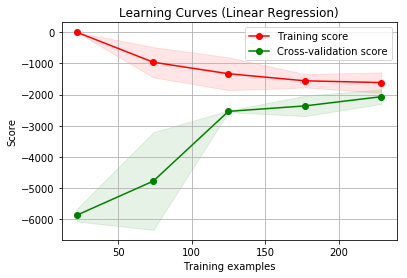

In [52]:
from sklearn.model_selection import ShuffleSplit

title = "Learning Curves (Linear Regression)"

plot_learning_curve(LinearRegression(), title, X_train, y_train, cv=2, n_jobs=-1)